# Loan Approval Prediction using Machine Learning

LOANS are the major requirement of the modern world. By this only, Banks get a major part of the total profit. It is beneficial
for students to manage their education and living expenses, and for people to buy any kind of luxury like houses, cars, etc.
But when it comes to deciding whether the applicant’s profile is relevant to be granted with loan or not. Banks have to look
after many aspects.So, here we will be using Machine Learning with Python to ease their work and predict whether the 
candidate’s profile is relevant or not using key features like Marital Status, Education, Applicant Income, Credit History, etc

## Loan Approval Prediction using Machine Learning

#### The dataset contains 13 features : 

## Importing Libraries and Dataset

In [18]:
#importing libaries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

#reading the data
data = pd.read_csv("C:/Users/USER/Desktop/rene/LoanApprovalPrediction.csv") 
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EDA

In [19]:
#getting information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


##### Replace null values with  Median of column

In [20]:
# Replaceing null values with median of LoanAmount
LoanAmount_median=data["LoanAmount"].median()
data["LoanAmount"].fillna(LoanAmount_median,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [21]:
# Replaceing null values with median of Loan_Amount_Term
Loan_Amount_Term_median=data["Loan_Amount_Term"].median()
data["Loan_Amount_Term"].fillna(Loan_Amount_Term_median,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [22]:
# Replaceing null values with median of Credit_History
Credit_History_median=data["Credit_History"].median()
data["Credit_History"].fillna(Credit_History_median,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.

In [23]:
#droping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

Visualize all the unique values in columns using barplot. This will simply show which value is dominating as per our dataset.

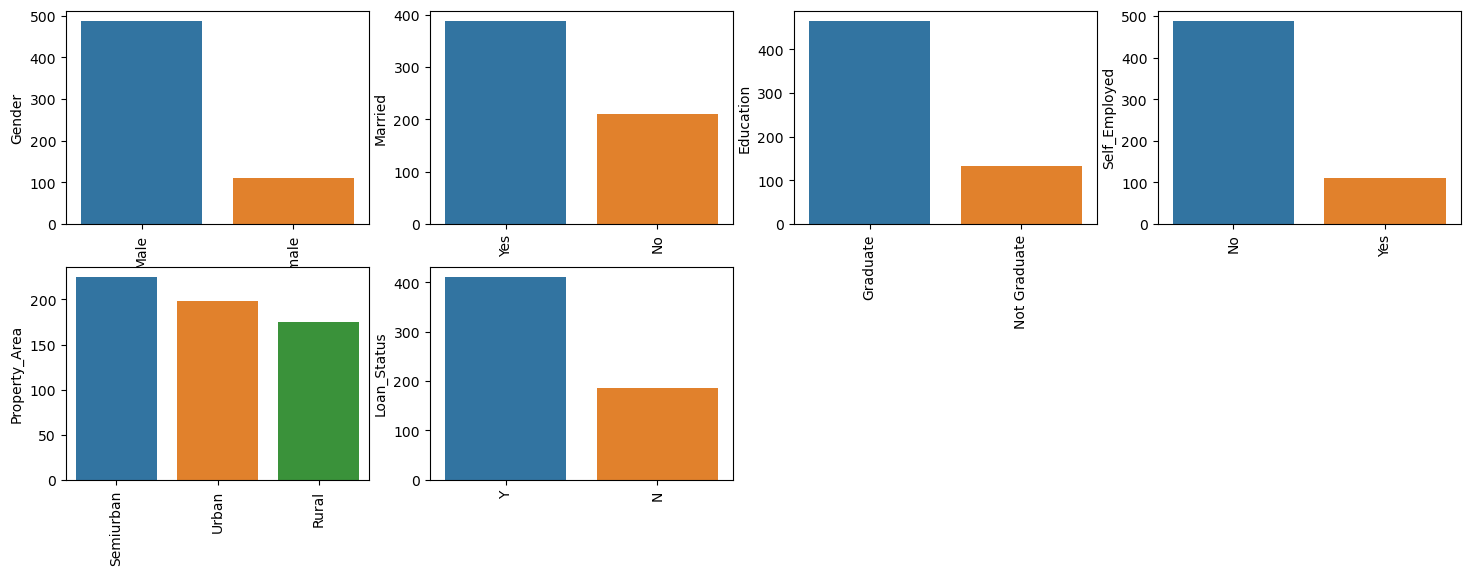

In [24]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
#Visualizeing the Categorical columns
for col in object_cols: 
    y = data[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1

As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

## Label Encoding

In [25]:
# Import label encoder
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
    data[col] = label_encoder.fit_transform(data[col])
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,127.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
594,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
595,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
596,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


Again check the object datatype columns. Let’s find out if there is still any left.

In [26]:
# To find the number of columns with datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

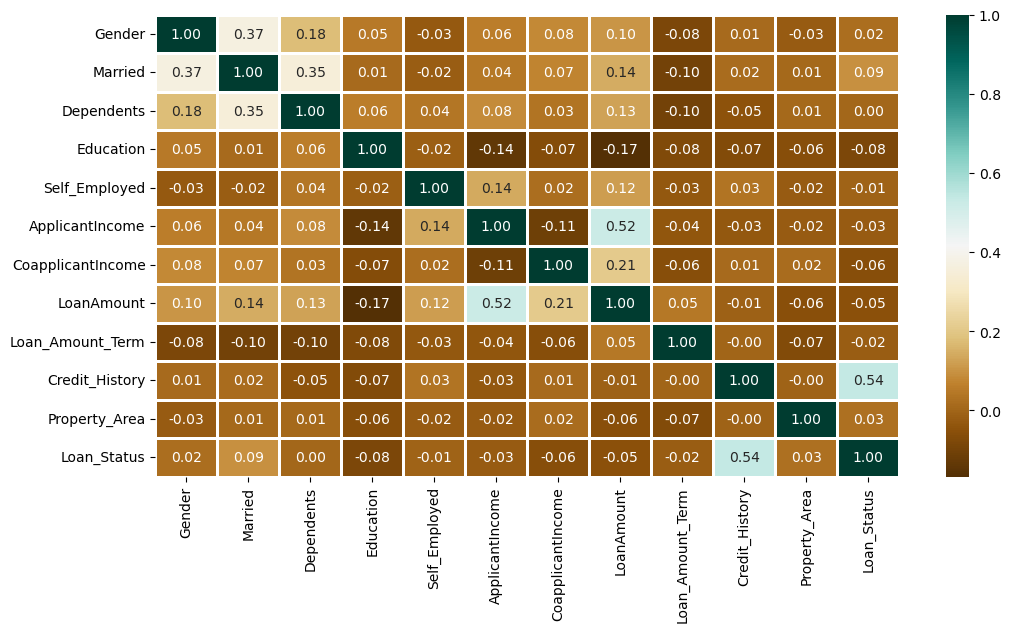

In [27]:
# visualizing correlation of the dataset using heatmap
plt.figure(figsize=(12,6)) 
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

##### Other heatmap

<Axes: >

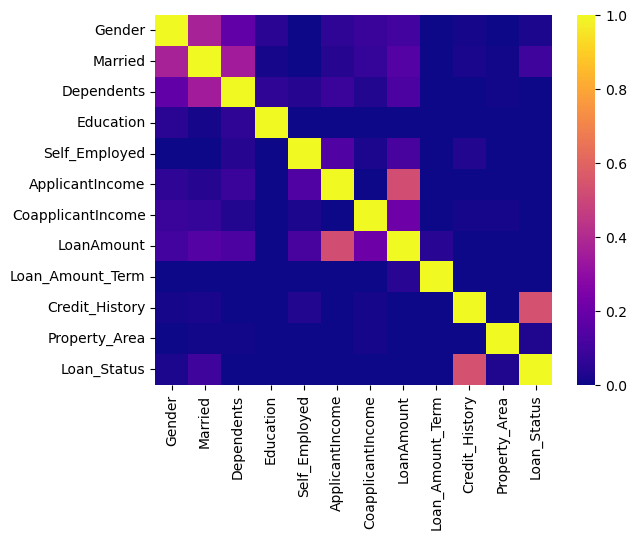

In [28]:
sns.heatmap(data.corr(), cmap='plasma', vmin=0, vmax=1) 

Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

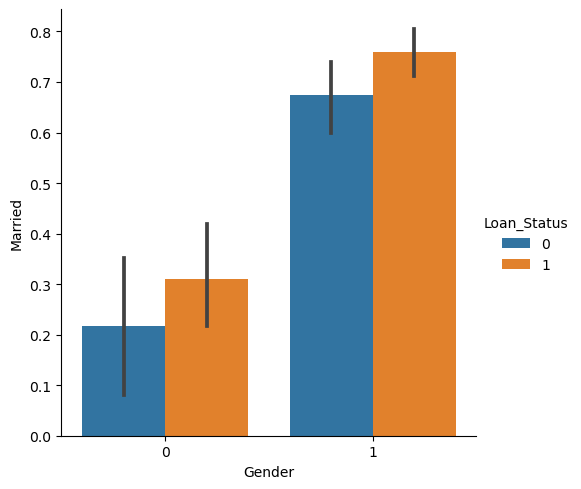

In [29]:
#visualizeing catplot
sns.catplot(x="Gender", y="Married", hue="Loan_Status",kind="bar",data=data)

Now we will find out if there is any missing values in the dataset using below code.

As there is no missing value then we must proceed to model training.

In [30]:
#checking  null values
for col in data.columns:
    data[col] = data[col].fillna(data[col].median()) 
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Training and Testing dataset

In [31]:
#spiltting dataset
from sklearn.model_selection import train_test_split 
#assiging the values to X, Y
X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
X.shape,Y.shape 
#identifying the shape of the  X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

### Model Training and Evaluation

As this is a classification problem so we will be using these models : 

To predict the accuracy we will use the accuracy score function from scikit-learn library.

In [32]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 

knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7,criterion = 'entropy', random_state =7) 
svc = SVC() 
lc = LogisticRegression() 

# making predictions on the training set 
for clf in (knn ,rfc , svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_train, Y_pred))


Accuracy score of  KNeighborsClassifier = 78.77094972067039
Accuracy score of  RandomForestClassifier = 96.92737430167597
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 80.44692737430168


In [33]:
# making predictions on the testing set 
for clf in (knn, rfc, svc,lc): 
    clf.fit(X_test, Y_test) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(Y_test, Y_pred))


Accuracy score of  KNeighborsClassifier = 76.66666666666667
Accuracy score of  RandomForestClassifier = 98.33333333333333
Accuracy score of  SVC = 70.41666666666667
Accuracy score of  LogisticRegression = 83.75


## Conclusion :

Random Forest Classifier is giving the best accuracy with an accuracy score of 97% for the testing dataset. And to get much better results ensemble learning techniques like Bagging and Boosting can also be used.